### 3. Reescribir la ecuación 4 como un sistema de ecuaciones diferenciales ordinarias de primer orden.

Primero se despeja $u''$ de la ecuacion, con lo cual se obtiene:
$$
u'' \;=\; -\,\bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]
\biggl(u \;-\; \tfrac{\varepsilon^2}{6}\,u^3\biggr)
$$

Ahora, observe que al realizar las siguientes sustituciones:

- $y_1 = u$,
- $y_2 = \dfrac{du}{d\tau}$,

y al derivar, se llega al sistema de ecuaciones diferenciales ordinarias deseado, pues:

- $\dfrac{dy_1}{d\tau} = \dfrac{du}{d\tau} = y_2,$
- $\dfrac{dy_2}{d\tau} = \dfrac{d^2 u}{d\tau^2}
= -\,\bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]
\bigl(u - \tfrac{\varepsilon^2}{6} \,u^3\bigr).$

Además, al sustituir $y_1 = u$ en la segunda ecuación, se obtiene:

$$
\begin{cases}
\dfrac{d y_{1}}{d\tau} = y_{2}, \\[6pt]
\dfrac{d y_{2}}{d\tau} = -\Bigl[\,1 + \varepsilon \lambda \,\Omega^2 \cos\bigl(\Omega\,\tau\bigr)\Bigr]\!
\Bigl(y_{1} \;-\; \tfrac{\varepsilon^2\,y_{1}^3}{6}\Bigr).
\end{cases}
$$


### 4. Solucion del sistema con `solve_ivp` de SciPy

In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def sloshing(t, y, epsilon, lam, Omega):
  y1, y2 = y
  dy1_dt = y2
  dy2_dt = - (1 + epsilon * lam * Omega**2 * np.cos(Omega * t)) * (y1 - (epsilon**2 / 6) * y1**3)

  return [dy1_dt, dy2_dt]


La definición anterior de la función fue realizada de acuerdo con los ejemplos presentados en *Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., ... & van Mulbregt, P. (2020). SciPy: Fundamental algorithms for scientific computing in Python (Version 1.9). SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html*.

Ahora bien, para elegir los parámetros se tendrán en cuenta múltiples aspectos:

*   Seleccionar parámetros que simplifiquen el análisis, por ejemplo: $$\varepsilon=0,\ \lambda=0$$

*   Escoger $\varepsilon$ en distintas magnitudes, ya que, si este parámetro es muy grande (en teoría), el sistema se vuelve altamente no lineal. En la ecuación (4) se observa que, en caso de que $\varepsilon$ sea grande, el término no lineal $\frac{\varepsilon^2 u^3}{6}$ domina sobre el término lineal $u$, lo cual intensifica la no linealidad del sistema.

*   El parámetro $\lambda$ se asocia con la amplitud del forzamiento externo (también se presenta en el paper como la proporción entre la *longitud efectiva* y la *amplitud de la oscilación*), por lo que incrementarlo puede provocar una respuesta más fuerte o, en algunos casos, más caótica. En particular, de acuerdo con (Guarín, 2021), valores pequeños de este parámetro implican la posibilidad de caminar más tiempo con el café sin derramarlo.

*   Será importante alterar el parámetro $\Omega = \frac{\omega}{\omega_0}$, el cual indica la frecuencia de excitación relativa; por ello, modificar dicho parámetro resulta fundamental para analizar el comportamiento del sistema.

* Por ultimo, veremos que ocurre al modificar los valores iniciales.

### Prueba 1:

Buscamos la simplificación del sistema y analizar cómo la alteración de $Ω$ afecta su comportamiento. En particular, se desea examinar qué ocurre en la simplificación cuando $Ω$ es mucho mayor que 1 y cuando es muy cercano a 1.

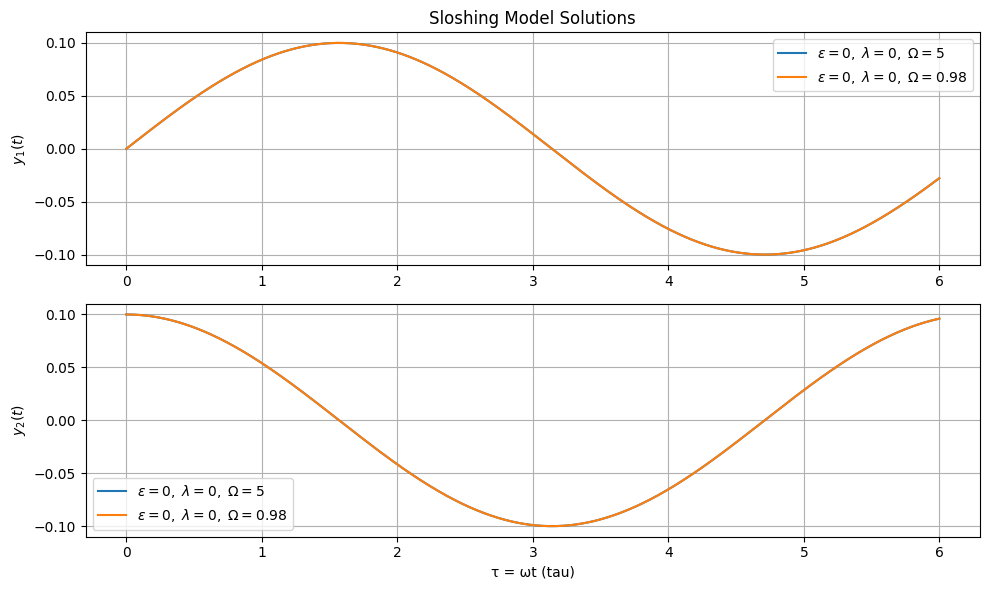

In [4]:
epsilon1, lam1, Omega1 = 0, 0, 5
t_span = (0.0, 6.0)
#Valores iniciales y_1(0) = 0.0 y y_2(0) = 0.1
y0 = [0.0, 0.1]

sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon1, lam1, Omega1),dense_output=True)

t_eval = np.linspace(t_span[0], t_span[1], 1000)

y1_sol1 = sol1.sol(t_eval)[0]
y2_sol1 = sol1.sol(t_eval)[1]


epsilon2, lam2, Omega2 = 0, 0, 0.98

sol2 = solve_ivp(sloshing, t_span, y0, method='RK45' ,args=(epsilon2, lam2, Omega2), dense_output=True)

y1_sol2 = sol2.sol(t_eval)[0]
y2_sol2 = sol2.sol(t_eval)[1]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, y1_sol1, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=5$')
plt.plot(t_eval, y1_sol2, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=0.98$')
plt.title('Sloshing Model Solutions')
plt.ylabel('$y_1(t)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, y2_sol1, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=5$')
plt.plot(t_eval, y2_sol2, label=r'$\varepsilon=0,\ \lambda=0,\ \Omega=0.98$')
plt.xlabel('τ = ωt (tau)')
plt.ylabel('$y_2(t)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Se ha simplificado el sistema imponiendo $\varepsilon = 0$ y $\lambda = 0$; de este modo, la ecuación se reduce esencialmente a la de un oscilador armónico simple con frecuencia natural unitaria (en las unidades de $\tau$). Al mismo tiempo, se varía el parámetro $\Omega$ para observar su efecto:

La comparación entre $\Omega=5$ y $\Omega=0.98$ ilustra claramente que, incluso en un sistema lineal sin forzamiento externo (ni términos no lineales), el valor de $\Omega$ no determina la cantidad de oscilaciones que se observan en un intervalo dado de $\tau$. Al tratarse de un caso simplificado, no se produce crecimiento de amplitud ni se evidencian efectos resonantes muy marcados.

Lo anterior se aprecia con mayor claridad al escribir la ecuación original tras la simplificación:

$$
\frac{d^2 u}{d\tau ^2} = - u
$$

donde la solución de la ecuación diferencial es:
$$
u(\tau) = c_1 cos(\tau) + c_2 sen(\tau)
$$
(Simmons, G. F. (1991). Differential equations with applications and historical notes (2nd ed.). McGraw-Hill. pag 33.)

lo cual concuerda con lo observado en la gráfica.

### Prueba 2:

Ahora, dejando los valores de $\lambda$ como en el paper: 0.1, 0.2 o 0.3, veamos qué ocurre si se alteran los valores de $\varepsilon$, en especial, qué sucede cuando este parámetro es muy grande o muy pequeño.

In [24]:
import ipywidgets as widgets
from ipywidgets import interact

def plot_sloshing(epsilon=0.01):
    # Parámetros fijos
    lam = 0.2
    Omega = 1.0
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución 1: con ε variable (valor elegido por el slider)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)

    # Solución 2: con ε fijo en 10
    sol2 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(10, lam, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\varepsilon={:.3f}$'.format(epsilon))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, $\varepsilon=10$')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\varepsilon={:.3f}$'.format(epsilon))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, $\varepsilon=10$')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

print("A continuacion se puede interactuar con el grafico: ")
# Creamos el slider interactivo para ε
interact(plot_sloshing, epsilon=(0.001, 20.0, 0.001));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=0.01, description='epsilon', max=20.0, min=0.001, step=0.001), Output(…

### Pregunta curiosa: Que ocurre si $ɛ\geq 10.5$? (Interactuar con el grafico)

**Caso $\varepsilon=0.01$:** el término cúbico $\tfrac{\varepsilon^2\,u^3}{6}$ resulta prácticamente insignificante en comparación con el término lineal $u$.  

Esto hace que las oscilaciones de $y_1(\tau)$ y $y_2(\tau)$ (desplazamiento y velocidad) se asemejen mucho a las de un oscilador casi lineal: la forma es aproximadamente sinusoidal y la amplitud se mantiene razonablemente equilibrada entre el lado positivo y el negativo.

**Caso $\varepsilon=10$:**  Al incrementar $\varepsilon$ de forma drástica, la contribución del término $\tfrac{\varepsilon^2\,u^3}{6}$ cobra gran relevancia.  En la gráfica se observa cómo las soluciones comienzan a *perder su simetría* y presentan variaciones más notables en la amplitud y la posición de equilibrio aparente.  

El desplazamiento $y_1(\tau)$ muestra un perfil más inclinado y un sesgo hacia valores más negativos, lo que indica que la parte cúbica está modificando fuertemente la evolución temporal de la respuesta.


### Prueba 3

Veamos qué ocurre al alterar el parámetro $λ$. Consideremos el caso en el que $ε$ sea pequeño, lo que favorece la linealidad, y en el que $Ω$ sea igual a 1.

In [23]:
def plot_sloshing(lam=10):
    epsilon = 0.1
    Omega = 1.0
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución con lambda variable (valor del slider)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)

    # Solución con lambda fijo en 0.01
    sol2 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, 0.01, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\lambda={:.3f}$'.format(lam))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, $\lambda=0.01$')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\lambda={:.3f}$'.format(lam))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, $\lambda=0.01$')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

print("A continuacion se puede interactuar con el grafico: ")

interact(plot_sloshing, lam=(0.001, 20.0, 0.001));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=10.0, description='lam', max=20.0, min=0.001, step=0.001), Output()), …

Con $\lambda$ grande ($\lambda=10$) se observa que la amplitud de la oscilación de $y_1(\tau)$ es algo mayor y el sistema conserva una forma relativamente sinusoidal, dado que $\varepsilon$ sigue siendo pequeño. Sin embargo, al aumentar $\lambda$, el término $\varepsilon \,\lambda\,\Omega^2\cos(\Omega\tau)$ en la ecuación introduce un forzamiento efectivo más intenso (aunque amortiguado por ser $\varepsilon=0.1$). La consecuencia es que el desplazamiento ($y_1$) presenta "picos" algo más pronunciados, y la velocidad ($y_2$) también experimenta un rango algo más amplio durante el mismo intervalo de tiempo, sin llegar a volverse fuertemente no lineal.

Con $\lambda$ pequeño ($\lambda=0.01$) la influencia del forzamiento externo (modulado por $\varepsilon\lambda\Omega^2\cos(\Omega\tau)$) es casi despreciable. El sistema se acerca aún más al comportamiento de un oscilador armónico simple, con menor variación en los máximos y mínimos de $y_1(\tau)$. Esto se aprecia en la gráfica, donde la curva presenta una amplitud menor y, en general, un perfil más “suave”.

### Prueba 4.

Comprobemos lo que sucede cuando alteramos los valores iniciales de la ecuacion diferencial

In [22]:
def plot_sloshing(y0a=0.1, y0b=0.0):
    # Parámetros fijos del modelo
    epsilon = 0.5
    lam = 1.0
    Omega = 1.0
    t_span = (0.0, 6.0)
    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    # Solución 1: Condiciones iniciales interactivas
    y0 = [y0a, y0b]
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    # Solución 2: Condiciones iniciales fijas "cerca a 1"
    y02 = [1, 1.2]
    sol2 = solve_ivp(sloshing, t_span, y02, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol2 = sol2.sol(t_eval)[0]
    y2_sol2 = sol2.sol(t_eval)[1]

    # Solución 3: Condiciones iniciales fijas "cerca a -1"
    y03 = [-1.2, -1]
    sol3 = solve_ivp(sloshing, t_span, y03, method='RK45', args=(epsilon, lam, Omega), dense_output=True)
    y1_sol3 = sol3.sol(t_eval)[0]
    y2_sol3 = sol3.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Gráfica de y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, V.I. = [{:.2f}, {:.2f}]'.format(y0a, y0b))
    plt.plot(t_eval, y1_sol2, label=r'$y_1(t)$, V.I. = [1, 1.2]')
    plt.plot(t_eval, y1_sol3, label=r'$y_1(t)$, V.I. = [-1.2, -1]')
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Gráfica de y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, V.I. = [{:.2f}, {:.2f}]'.format(y0a, y0b))
    plt.plot(t_eval, y2_sol2, label=r'$y_2(t)$, V.I. = [1, 1.2]')
    plt.plot(t_eval, y2_sol3, label=r'$y_2(t)$, V.I. = [-1.2, -1]')
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


print("A continuacion se puede interactuar con el grafico: ")

interact(plot_sloshing, y0a=(-2.0, 2.0, 0.1), y0b=(-2.0, 2.0, 0.1));

A continuacion se puede interactuar con el grafico: 


interactive(children=(FloatSlider(value=0.1, description='y0a', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

## Pregunta curiosa: Que ocurre cuando los valores iniciales son $y_1(0) = 0, y_2(0) = 0$? (Interactuar con el grafico)

Se mantienen fijos parámetros como \($\varepsilon=0.5$\), \($\lambda=1$\) y \($\Omega=1$\), variando únicamente las condiciones iniciales.  
Las ecuaciones diferenciales resultantes son no lineales, de modo que diferentes puntos de partida pueden conducir a trayectorias significativamente distintas.  
Al cambiar la inclinación o la velocidad inicial del líquido, se observan alteraciones en la amplitud y fase de las oscilaciones.  
El caso con condiciones iniciales cercanas a cero muestra oscilaciones más moderadas y estables.  
En contraste, condiciones iniciales positivas o negativas grandes producen movimientos de mayor amplitud, con desviaciones notables.  
Este fenómeno resalta la sensibilidad del sistema ante pequeños cambios de arranque, típica de los sistemas no lineales.  
Físicamente, demuestra que la forma en que iniciamos el movimiento de un recipiente con líquido influye de forma duradera en el riesgo de derrame.

### Solucion "Balanceada" teniendo en cuenta las observaciones anteriores.


Se usan los valores mas estables o mas interesantes para el analisis final del modelo

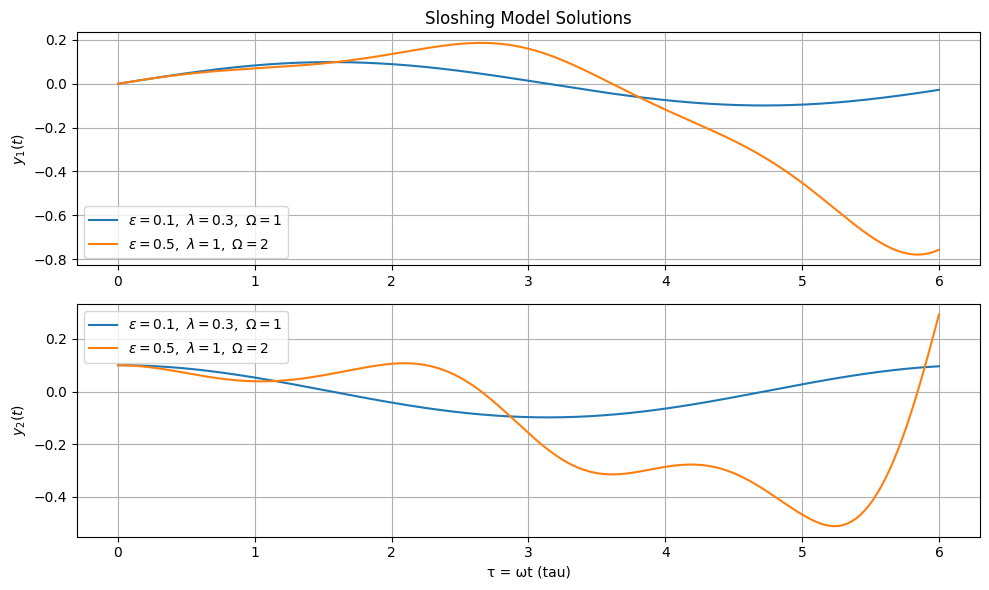

In [ ]:
epsilon1, lam1, Omega1 = 0.1, 0.3, 1
t_span = (0.0, 6.0)
#Valores iniciales y_1(0) = 0.0 y y_2(0.1) = 0.1
y0 = [0.0, 0.1]

sol1 = solve_ivp(sloshing, t_span, y0, method='RK45', args=(epsilon1, lam1, Omega1),dense_output=True)

t_eval = np.linspace(t_span[0], t_span[1], 1000)

y1_sol1 = sol1.sol(t_eval)[0]
y2_sol1 = sol1.sol(t_eval)[1]

epsilon2, lam2, Omega2 = 0.5, 1, 2

sol2 = solve_ivp(sloshing, t_span, y0, method='RK45' ,args=(epsilon2, lam2, Omega2), dense_output=True)

y1_sol2 = sol2.sol(t_eval)[0]
y2_sol2 = sol2.sol(t_eval)[1]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_eval, y1_sol1, label=r'$\varepsilon=0.1,\ \lambda=0.3,\ \Omega=1$')
plt.plot(t_eval, y1_sol2, label=r'$\varepsilon=0.5,\ \lambda=1,\ \Omega=2$')
plt.title('Sloshing Model Solutions')
plt.ylabel('$y_1(t)$')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_eval, y2_sol1, label=r'$\varepsilon=0.1,\ \lambda=0.3,\ \Omega=1$')
plt.plot(t_eval, y2_sol2, label=r'$\varepsilon=0.5,\ \lambda=1,\ \Omega=2$')
plt.xlabel('τ = ωt (tau)')
plt.ylabel('$y_2(t)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### 5. Analisis y Conclusion

### 1. **Comportamiento temporal**

- **Solución azul ($\varepsilon=0.1, \lambda=0.3, \Omega=1$):** Presenta oscilaciones de amplitud moderada y frecuencia unitaria en $\tau$. Al tener un valor pequeño de $\varepsilon$, la respuesta se mantiene en un régimen cercano a la linealidad, con curvas relativamente “suaves” y simétricas.

- **Solución naranja ($\varepsilon=0.5, \lambda=1, \Omega=2$):** Muestra oscilaciones de mayor amplitud y un período más corto (ya que $\Omega=2$ implica que, en el mismo intervalo de $\tau$, se observan más oscilaciones). El aumento en $\varepsilon$ y $\lambda$ realza la influencia del forzamiento y de la no linealidad, de modo que las gráficas revelan variaciones más marcadas tanto en $y_1(\tau)$ (desplazamiento) como en $y_2(\tau)$ (velocidad).

### 2. **Relevancia respecto a la ecuación diferencial**

La ecuación original:
$$
u'' + \bigl[1 + \varepsilon \lambda \,\Omega^2 \cos(\Omega\,\tau)\bigr]\!
\Bigl(u - \tfrac{\varepsilon^2}{6}\,u^3\Bigr) \;=\; 0
$$
describe un oscilador que incorpora un término de bombeo ($\cos(\Omega \tau)$) y una no linealidad cúbica ($u^3$) modulada por $\varepsilon^2$.

Al incrementar $\varepsilon$ y $\lambda$, se hace más evidente la influencia del forzamiento y de los efectos no lineales, lo cual altera la amplitud, la forma de onda y la estabilidad de la oscilación.

Cuando $\Omega$ aumenta, la frecuencia efectiva de excitación supera a la frecuencia natural, provocando que el sistema realice más ciclos (en la misma escala de $\tau$) y, en ocasiones, modificando de forma notable la amplitud de la oscilación.

### 3. **Conclusiones físicas (¿Qué ocurre con el café?)**

1. **Efecto de la frecuencia de paso ($\Omega$):**  
   Si la frecuencia a la que se “bombea” el recipiente (por ejemplo, al caminar) coincide con o excede la frecuencia natural del líquido, el café oscila con ciclos más rápidos. Pueden darse resonancias si $\Omega$ se acerca a 1, o bien un forzamiento muy activo cuando $\Omega > 1$.

2. **Efecto de la no linealidad ($\varepsilon$):**  
   Con $\varepsilon$ pequeño (caso azul), el líquido se comporta de manera casi lineal, de modo que las oscilaciones son predecibles y de amplitud moderada. En cambio, con $\varepsilon$ mayor (caso naranja), la oscilación puede volverse más pronunciada, aumentando la probabilidad de derramar líquido al caminar.

3. **Efecto del acoplamiento ($\lambda$):**  
   Un valor mayor de $\lambda$ intensifica la magnitud del bombeo. Si, además, $\varepsilon$ tiene un valor elevado, el desplazamiento del café puede crecer drásticamente, generando mayores salpicaduras. Al realizar el análisis para un $\lambda$ menor, también se obtienen los resultados de Guarín (pág. 10), donde se establece que esto se traduce en menos salpicaduras y en la posibilidad de dar más pasos, como se mencionó anteriormente.

**Conclusión 1:**  
Al caminar con café, una combinación de alta frecuencia de paso ($\Omega$ grande), junto con una mayor profundidad del líquido o amplitud de oscilación efectiva ($\varepsilon$ elevada) y un acoplamiento elevado ($\lambda$ grande), genera movimientos del café más bruscos y de mayor amplitud. Esto **incrementa el riesgo de derrames**. En cambio, pasos más lentos (cuando $\Omega\approx1$ o es menor), recipientes menos llenos (con $\varepsilon$ menor) o un acoplamiento reducido ($\lambda$ pequeño) mitigan la oscilación y facilitan caminar sin derramar café.

En síntesis, estos parámetros gobiernan la dinámica de “sloshing” y explican por qué, al variar la forma de caminar o la cantidad de líquido, se modifica radicalmente la manera en que el café se mueve en el recipiente.

**Conclusión 2:** No caminar con el café. ✅QED✅

# En caso de querer experimentar:

In [21]:
def plot_sloshing(epsilon1=0.01, lam=0.2, Omega=1.0):
    t_span = (0.0, 6.0)
    y0 = [0.0, 0.1]  # Condiciones iniciales

    # Solución 1: con ε variable (epsilon1)
    sol1 = solve_ivp(sloshing, t_span, y0, method='RK45',
                     args=(epsilon1, lam, Omega), dense_output=True)

    t_eval = np.linspace(t_span[0], t_span[1], 1000)

    y1_sol1 = sol1.sol(t_eval)[0]
    y2_sol1 = sol1.sol(t_eval)[1]

    plt.figure(figsize=(10, 6))

    # Primer subplot: y1(t)
    plt.subplot(2, 1, 1)
    plt.plot(t_eval, y1_sol1, label=r'$y_1(t)$, $\varepsilon={:.3f}$'.format(epsilon1))
    plt.title('Soluciones del modelo de Sloshing')
    plt.ylabel('$y_1(t)$')
    plt.grid(True)
    plt.legend()

    # Segundo subplot: y2(t)
    plt.subplot(2, 1, 2)
    plt.plot(t_eval, y2_sol1, label=r'$y_2(t)$, $\varepsilon={:.3f}$'.format(epsilon1))
    plt.xlabel('τ = ωt (tau)')
    plt.ylabel('$y_2(t)$')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

interact(plot_sloshing,
         epsilon1=(0.001, 20.0, 0.001),
         lam=(0.0, 1.0, 0.01),
         Omega=(0.0, 5.0, 0.1));


interactive(children=(FloatSlider(value=0.01, description='epsilon1', max=20.0, min=0.001, step=0.001), FloatS…

### **Pregunta curiosa:** Elija un valor de *lambda* aleatorio y observe que siempre tendrá un valor de *epsilon* (o un intervalo) para el cual proporciona una solución "sin sentido". ¿Qué ocurre?  
**Tomemos:** $ɛ = 7$, $λ = 0.2$, $Ω = 2$.
